### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


#1. Análisis de facturación



In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
tiendas = [tienda,tienda2,tienda3,tienda4]
ingreso_total_tiendas = {}

for i,tienda in enumerate(tiendas , start=1):
  nombre = f'Tienda {i}'
  suma = float(tienda['Precio'].sum())
  ingreso_total_tiendas[nombre] = suma

print(ingreso_total_tiendas)

{'Tienda 1': 1150880400.0, 'Tienda 2': 1116343500.0, 'Tienda 3': 1098019600.0, 'Tienda 4': 1038375700.0}


In [5]:
# Convertir el diccionario en un dataframe para generar un gráfico
df = pd.DataFrame.from_dict(ingreso_total_tiendas ,orient = 'index' ,columns=['Ingreso'])
df = df.reset_index()
df.columns = ['Tienda','Ingreso']
df

,Tienda,Ingreso
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


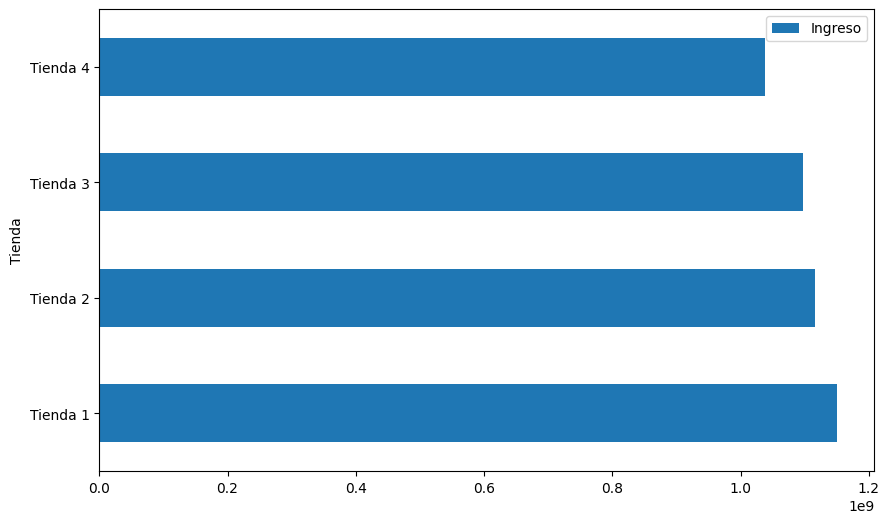

In [6]:
fig , ax = plt.subplots(figsize=(10,6))
df.plot(kind = 'barh' , x = 'Tienda' , y = 'Ingreso' , ax=ax)
plt.show()

# 2. Ventas por categoría

**Tienda 1**

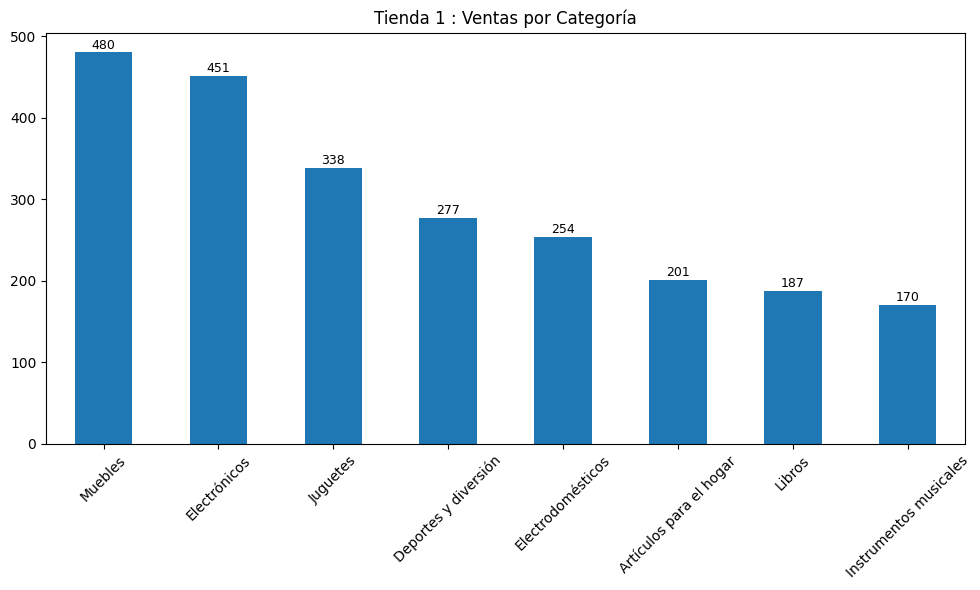

In [7]:
def ventas_categoria(tienda : pd.DataFrame , titulo) :
  ventas_categoria = tienda['Categoría del Producto'].value_counts()

  fig , ax = plt.subplots(figsize=(10,6))
  ventas_categoria.plot(kind = 'bar' , ax=ax )

  ax.set_title(titulo)
  ax.set_xlabel(None)
  ax.tick_params(axis = 'x' , rotation = 45)

  for i, valor in enumerate(ventas_categoria.values):
      ax.text(i, valor + 1, str(valor), ha='center', va='bottom', fontsize=9)
  plt.tight_layout()
  plt.show()

ventas_categoria(tienda, 'Tienda 1 : Ventas por Categoría')

**Tienda 2**

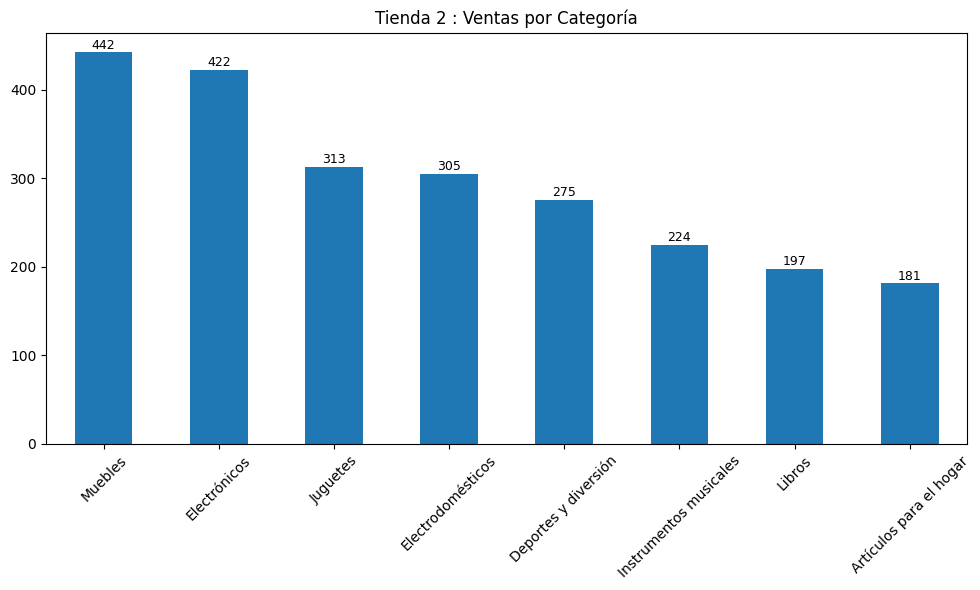

In [8]:
ventas_categoria(tienda2, 'Tienda 2 : Ventas por Categoría')

**Tienda 3**

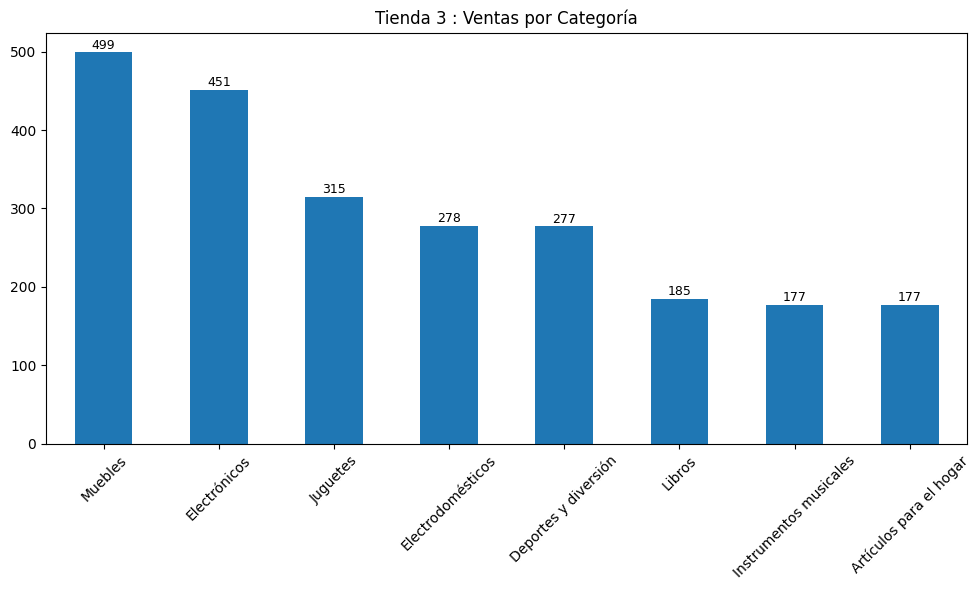

In [9]:
ventas_categoria(tienda3, 'Tienda 3 : Ventas por Categoría')

**Tienda 4**

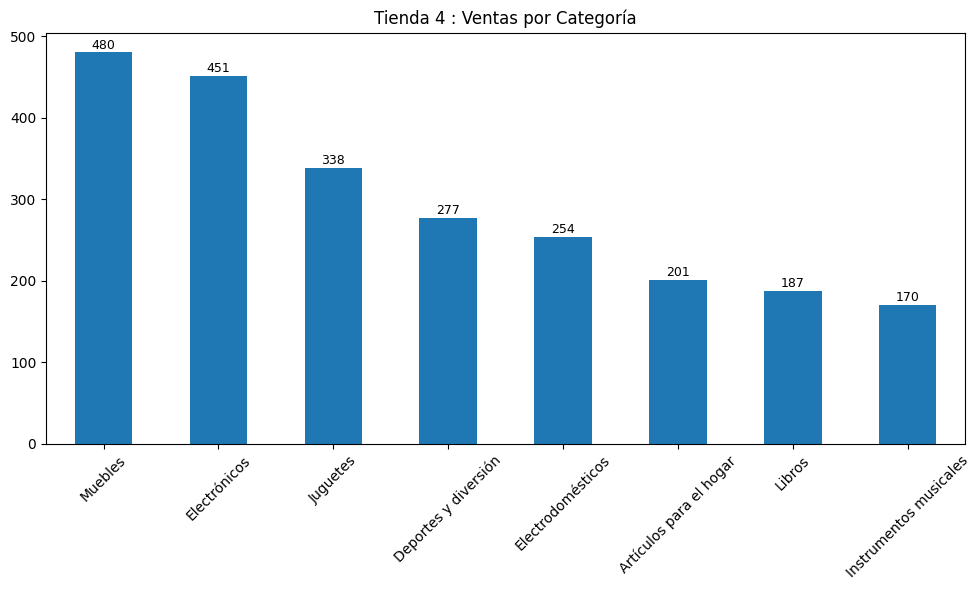

In [10]:
ventas_categoria(tienda4, 'Tienda 4 : Ventas por Categoría')

# 3. Calificación promedio de la tienda


In [11]:
tiendas = [tienda,tienda2,tienda3,tienda4]

calificacion_promedio_tiendas = {}

for i,tienda in enumerate(tiendas, start=1):
  nombre = f'Tienda {i}'
  promedio = float(round(tienda['Calificación'].mean() , 3))
  calificacion_promedio_tiendas[nombre] = promedio

print(calificacion_promedio_tiendas)

{'Tienda 1': 3.996, 'Tienda 2': 4.037, 'Tienda 3': 4.048, 'Tienda 4': 3.996}


# 4. Productos más y menos vendidos



In [12]:
def producto_max_min(tienda : pd.DataFrame) :

  productos = tienda['Producto'].value_counts()
  producto_mas_vendido = productos.idxmax()
  producto_menos_vendido = productos.idxmin()
  print(f'Producto más vendido : {producto_mas_vendido} -> {productos.max()}')
  print(f'Producto menos vendido : {producto_menos_vendido} ->  {productos.min()}')

producto_max_min(tienda4)

Producto más vendido : Cama box -> 62
Producto menos vendido : Guitarra eléctrica ->  33


# 5. Envío promedio por tienda

In [13]:
promedio_costo_envio_tiendas = {}

for i,tienda in enumerate(tiendas , start=1):
  nombre = f'Tienda {i}'
  promedio = float(round(tienda['Costo de envío'].mean(),4))
  promedio_costo_envio_tiendas[nombre] = promedio

promedio_costo_envio_tiendas

{'Tienda 1': 23459.4572,
 'Tienda 2': 25216.2357,
 'Tienda 3': 24805.6804,
 'Tienda 4': 23459.4572}